## 1. Leitura dos Dados

In [21]:
# Importando bibliotecas necessarias

import pandas as pd # Biblioteca para manipulacao de dados
import numpy as np # Biblioteca para calculos numericos
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para dividir os dados em treino e teste e realizar validacao cruzada
from sklearn.ensemble import RandomForestClassifier                   # Biblioteca para classificador de floresta aleatoria
from sklearn.linear_model import LogisticRegression, SGDClassifier    # Bibliotecas para modelos de regressao logistica e SGD
from sklearn.naive_bayes import GaussianNB                            # Biblioteca para classificador Naive Bayes Gaussiano
from sklearn.neighbors import KNeighborsClassifier                    # Biblioteca para classificador KNN
from sklearn.preprocessing import RobustScaler                        # Biblioteca para escalonamento robusto
from sklearn.metrics import accuracy_score                            # Biblioteca para calcular a acuracia


In [5]:
# Leitura do arquivo CSV transformado
df = pd.read_csv('../src/datasets/dados_modificados.csv')

In [6]:
df.head()

,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,NATUREZA,VALOR,QUANTIDADE,TICKET_MEDIO
0,1,1,0,4,4,6,9,1.765604e+12,30585000,57727.758705
1,1,1,3,3,2,4,9,3.268242e+10,388000,84233.041237
2,1,1,4,5,6,5,9,1.097083e+13,25569000,429067.736712
3,2,1,3,4,1,2,2,7.578677e+10,991000,76475.045409
4,1,1,1,4,0,5,9,4.915000e+08,6000,81916.666667


## 2. Definição das variáveis explicativas (X = características) e da variável de resposta (Y = rótulo)

In [7]:
X = df.drop('PAG_PFPJ', axis=1)  # Variaveis independentes
y = df['PAG_PFPJ']  # Variavel dependente

## 3. Separação da base de dados em _Dados de Treino_ e _Dados de Teste_

In [9]:
print(y.value_counts())

PAG_PFPJ
1    8183
2    1816
0       1
Name: count, dtype: int64


In [10]:
# Remove a classe 0 (com apenas 1 registro)
df_filtrado = df[df['PAG_PFPJ'] != 0]

# Separa X e y
X = df_filtrado.drop('PAG_PFPJ', axis=1)
y = df_filtrado['PAG_PFPJ']

In [ ]:
# Subamostragem e escalonamento
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.3, stratify=y, random_state=42)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_small)


In [16]:
# Divisão dos dados subamostrados e escalonados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_small, test_size=0.2, stratify=y_small, random_state=42
)

In [17]:
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras\n")

Tamanho do conjunto de treino: 2399 amostras
Tamanho do conjunto de teste: 600 amostras



In [18]:
# Informando sobre a distribuicao das classes
print("Distribuição das classes em y_small:")
print(y_small.value_counts())

Distribuição das classes em y_small:
PAG_PFPJ
1    2454
2     545
Name: count, dtype: int64


## 4. Construção de um Modelo de Classificação

In [19]:
# Definição dos modelos de classificação a serem testados
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SGD SVM": SGDClassifier(loss='hinge', random_state=42)  # Alternativa leve ao SVC
}

In [25]:
# Escalando o conjunto de teste com o mesmo scaler do treino
X_test_scaled = scaler.transform(X_test)

# Treinamento e avaliação dos modelos
for nome, modelo in modelos.items():
    # Treina o modelo com os dados de treino
    modelo.fit(X_train, y_train)
    print(f"{nome} treinado com sucesso!")

    # Realiza predições com os dados de teste
    y_pred = modelo.predict(X_test)

    # Calcula e exibe a acurácia no conjunto de teste
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia do {nome}: {acc:.4f}\n")
    print(f"10 primeiras previsões do {nome}: {y_pred[:10]}\n")


c:\Users\caiob\Documents\Caio\SENAC\TADS038 1T - 3º Período\Data Science - Principios e técnicas - Marco\transacoesPixDS\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Logistic Regression treinado com sucesso!
Acurácia do Logistic Regression: 1.0000

10 primeiras previsões do Logistic Regression: [1 1 1 1 1 1 1 1 1 1]

Random Forest treinado com sucesso!
Acurácia do Random Forest: 1.0000

10 primeiras previsões do Random Forest: [1 1 1 1 1 1 1 1 1 1]

Naive Bayes treinado com sucesso!
Acurácia do Naive Bayes: 1.0000

10 primeiras previsões do Naive Bayes: [1 1 1 1 1 1 1 1 1 1]

KNN treinado com sucesso!
Acurácia do KNN: 0.9783

10 primeiras previsões do KNN: [1 1 1 1 1 1 1 1 1 1]

SGD SVM treinado com sucesso!
Acurácia do SGD SVM: 0.9817

10 primeiras previsões do SGD SVM: [1 1 1 1 1 1 1 1 1 1]



## 5. Avaliação dos modelos


--- Avaliação dos Modelos Treinados ---

Logistic Regression:
  Acurácia:  0.1817
  Precisão:  0.0330
  Recall:    0.1817
  F1-score:  0.0559

Random Forest:
  Acurácia:  0.1817
  Precisão:  0.0330
  Recall:    0.1817
  F1-score:  0.0559

Naive Bayes:
  Acurácia:  0.6883
  Precisão:  0.6475
  Recall:    0.6883
  F1-score:  0.6673

KNN:
  Acurácia:  0.1817
  Precisão:  0.0330
  Recall:    0.1817
  F1-score:  0.0559

SGD SVM:
  Acurácia:  0.1817
  Precisão:  0.0330
  Recall:    0.1817
  F1-score:  0.0559


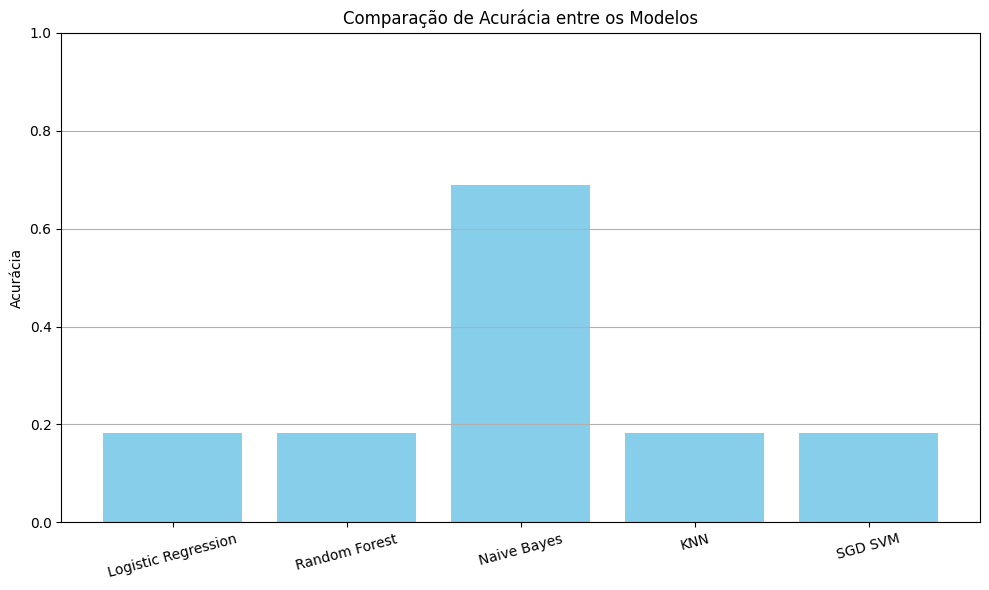

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Dicionário para armazenar modelos treinados
modelos_treinados = {}

# Treinamento dos modelos
for nome, modelo in modelos.items():
    modelo.fit(X_scaled, y_small)
    modelos_treinados[nome] = modelo

# Avaliação
resultados = {"Modelo": [], "Acurácia": [], "Precisão": [], "Recall": [], "F1-score": []}

for nome, modelo in modelos_treinados.items():
    y_pred = modelo.predict(X_test_scaled)  # usar dados escalonados no teste

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    resultados["Modelo"].append(nome)
    resultados["Acurácia"].append(acc)
    resultados["Precisão"].append(prec)
    resultados["Recall"].append(rec)
    resultados["F1-score"].append(f1)

# Impressão
print("\n--- Avaliação dos Modelos Treinados ---")
for i in range(len(resultados["Modelo"])):
    print(f"\n{resultados['Modelo'][i]}:")
    print(f"  Acurácia:  {resultados['Acurácia'][i]:.4f}")
    print(f"  Precisão:  {resultados['Precisão'][i]:.4f}")
    print(f"  Recall:    {resultados['Recall'][i]:.4f}")
    print(f"  F1-score:  {resultados['F1-score'][i]:.4f}")

# Gráfico da acurácia
plt.figure(figsize=(10, 6))
plt.bar(resultados["Modelo"], resultados["Acurácia"], color='skyblue')
plt.title("Comparação de Acurácia entre os Modelos")
plt.ylabel("Acurácia")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 6. Análise Comparativa dos Modelos de Classificação

Nesta análise, observamos que o modelo Naive Bayes (NB) apresenta desempenho significativamente superior em relação aos demais modelos testados, alcançando uma acurácia próxima de 69%, enquanto os outros classificadores obtiveram valores em torno de 18%. Essa disparidade pode ser atribuída a diferentes fatores que discutiremos a seguir.

---

**Possíveis Causas para a Diferença de Desempenho**

1. Desbalanceamento da Base de Dados

É comum em problemas de classificação que a distribuição das classes seja desigual, ou seja, algumas classes possuem muito mais exemplos do que outras. Em tais situações, modelos podem tender a “chutar” a classe majoritária para maximizar a acurácia global, o que resulta em baixa performance na identificação das classes minoritárias. Essa característica pode levar a métricas infladas para o Naive Bayes caso ele capture melhor essa distribuição, enquanto outros modelos podem apresentar dificuldade para generalizar.

_Ação recomendada:_
Verificar a distribuição das classes e, se necessário, aplicar técnicas para balanceamento, como oversampling (SMOTE), undersampling ou geração de dados sintéticos.

---

2. Natureza dos Dados e Premissas dos Modelos

O Naive Bayes, especialmente na sua versão Gaussiana, assume que as características são condicionalmente independentes e seguem uma distribuição normal dentro de cada classe. Se essas premissas forem razoavelmente atendidas pelos dados, o NB tende a performar bem, mesmo em cenários com poucos dados.

Por outro lado, modelos como Random Forest, SVM e KNN são menos restritivos em termos de premissas, mas podem exigir um maior volume de dados e maior cuidado no pré-processamento para atingir desempenho satisfatório.

---

3. Configuração e Hiperparâmetros dos Modelos

O desempenho dos modelos de machine learning depende fortemente da escolha dos hiperparâmetros. No caso dos modelos Random Forest com `n_estimators=100` e `max_depth=10`, por exemplo, a limitação da profundidade da árvore pode impedir que o modelo capture padrões mais complexos dos dados, reduzindo sua capacidade preditiva.

Modelos como SVM e KNN também necessitam de ajustes cuidadosos nos parâmetros, como o kernel, regularização e número de vizinhos, para evitar underfitting ou overfitting.

_Ação recomendada:_
Realizar buscas de hiperparâmetros utilizando técnicas como Grid Search ou Random Search, além de validação cruzada para melhor generalização.

---

4. Pré-processamento e Engenharia de Features

Além da escalonamento dos dados, outros processos de pré-processamento podem ser necessários para melhorar a performance dos modelos, tais como:

- Seleção e extração de features relevantes;
- Transformações não lineares (por exemplo, PCA);
- Tratamento de valores faltantes e outliers;
- Balanceamento das classes conforme citado anteriormente.

A eficácia do pré-processamento pode variar conforme o modelo, sendo essencial para modelos mais complexos.

---

**Considerações Finais**

A superioridade do Naive Bayes no presente cenário sugere que as premissas são adequadas para os dados em questão ou que os demais modelos ainda não foram otimizados para capturar a estrutura dos dados. Para uma avaliação mais robusta, recomenda-se:

- Análise detalhada da matriz de confusão para identificar erros específicos;
- Experimentação com técnicas de balanceamento e ajuste de hiperparâmetros;
- Avaliação de outras métricas além da acurácia, como precisão, recall, F1-score e AUC-ROC, especialmente em casos de desbalanceamento.

Esses passos são fundamentais para garantir que a escolha do modelo seja pautada em uma análise crítica e científica dos resultados, assegurando maior confiabilidade nas inferências e decisões baseadas no modelo.


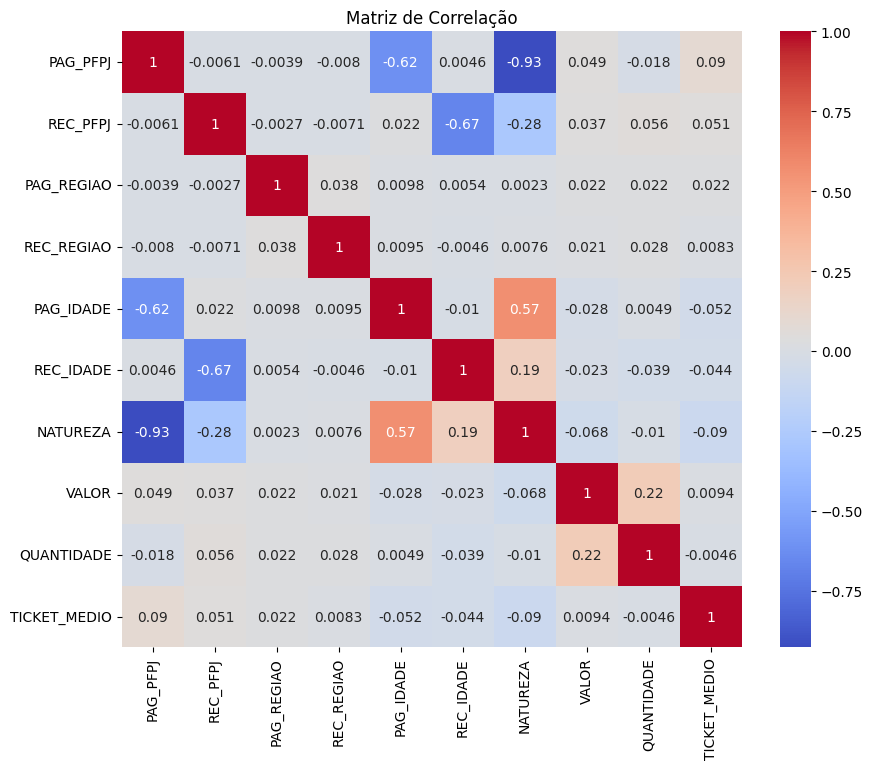

In [27]:
import seaborn as sns

df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Verificando balanceamento entre as classes:

In [28]:
# Verificando a distribuição das classes após o pré-processamento
print(y.value_counts(normalize=True))

PAG_PFPJ
1    0.818382
2    0.181618
Name: proportion, dtype: float64


_Passo futuro: considerar técnicas de oversampling (SMOTE), undersampling ou usar métricas balanceadas_

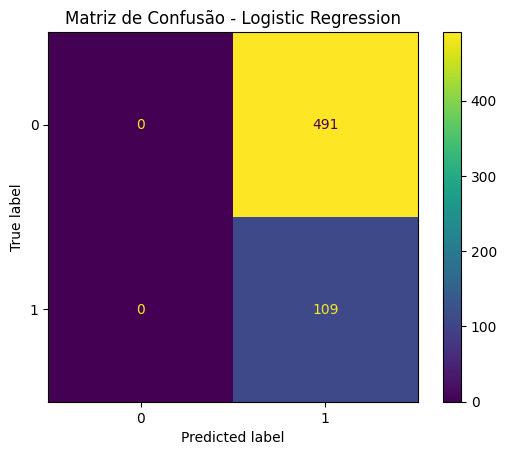

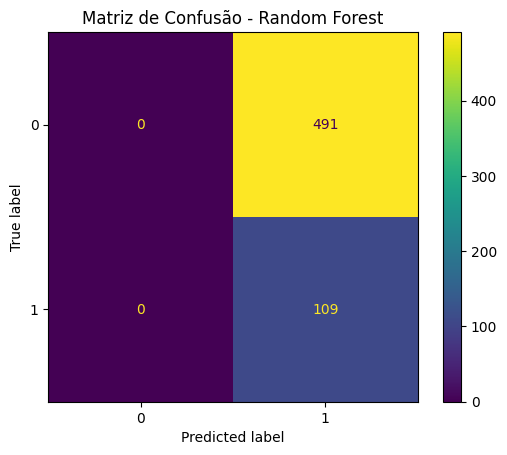

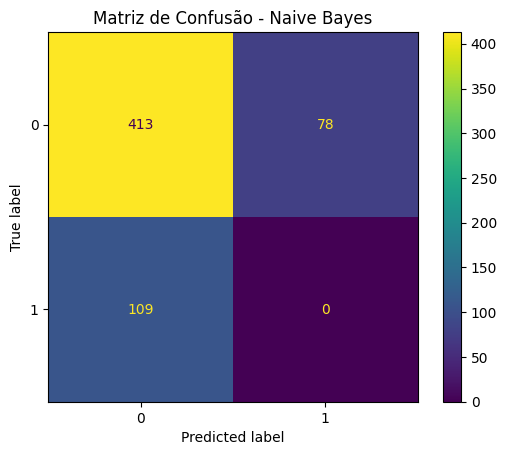

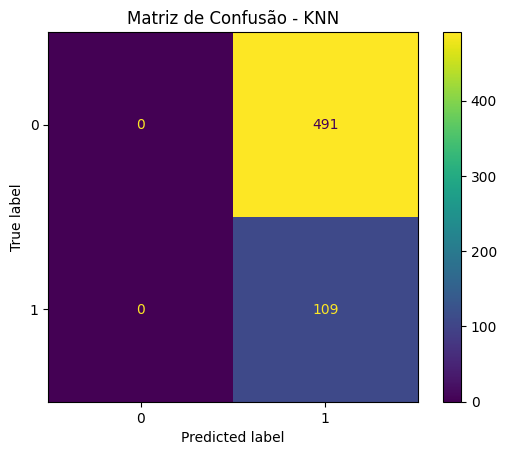

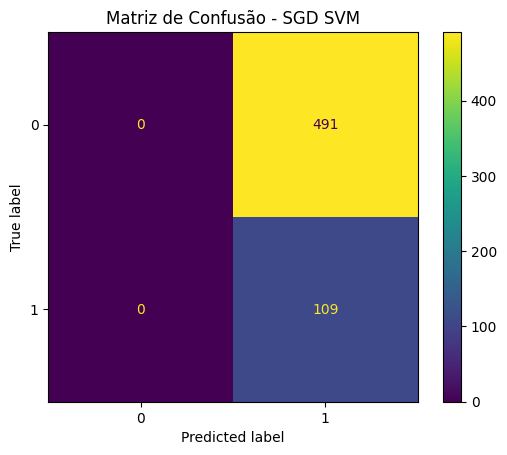

In [31]:
# Visualização da matriz de confusão para os modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Itera sobre todos os modelos treinados
for nome, modelo in modelos_treinados.items():
    # Faz a predição no conjunto de teste escalonado
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcula a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Cria o display da matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plota a matriz de confusão
    disp.plot()
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

## 7. Salvando o modelo

Opta-se pelo uso do modelo 3, Naive Bayes, por apresentar melhores valores de:
- Acurácia:  0.6883; 
- Precisão:  0.6475;   
- Recall:    0.6883;
- F1-score:  0.6673.

In [32]:
import pickle

# Salvar o modelo Naive Bayes em um arquivo .pkl
with open('../model/naive_bayes_model.pkl', 'wb') as arquivo:
    pickle.dump(modelos_treinados["Naive Bayes"], arquivo)

print("Modelo Naive Bayes salvo com sucesso!")

Modelo Naive Bayes salvo com sucesso!
